# TP ML : Apprentissage supervisé - Part I

### Nom-prénom du binôme : 

## - Import des données IRIS

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import *
#from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn import svm  
from sklearn import datasets  
import numpy as np
from sklearn.feature_extraction import DictVectorizer

#chargement des données
flower = datasets.load_iris()
print(flower.data.shape)#taille matrice chaque données est caractérisé par un vecteur 4
print(flower.target.shape)#nombre de classes
print(flower.target_names)#nom des classes
print(flower.feature_names)#descripteur


(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## - Classification binaire lineaire par SVM

In [50]:
#Selection des deux premiers attributs
X_iris = flower.data[:, :2]
Y_iris = flower.target
# selection des classes setosa=0 et versicolor=1
ind=np.nonzero((Y_iris==0) | (Y_iris==1))
X_iris_bin=X_iris[ind]#100 points / 2 descripteurs
Y_iris_bin=Y_iris[ind]#dimension 100 correspond a la classe des 100 points d apprentissages 
print(X_iris_bin.shape)#100 points d'apprentissages

(100, 2)


In [51]:
#Apprentissage d'un modèle SVM lineaire - C fixé
C=1
svc = svm.SVC(kernel='linear', C=C).fit(X_iris_bin, Y_iris_bin)#modele - SVM - hyperparametre C constante de pondération entre perte et regularisation cf cours lambda
#2em hp choix du noyau kernel lineaire k(x,y)=xi(t)xj  entrainement lance 

In [52]:
#Etude des vecteurs support
#récupérer l'indice des vecteurs support dans la variable SV_ind
SV_binary=svc.support_vectors_#definit la forme de la frontiere de decision 
SV_ind=svc.support_
print(SV_ind.shape)
print(SV_binary.shape)

(16,)
(16, 2)


(100, 2)
(100,)
(220, 235)
(220, 235)


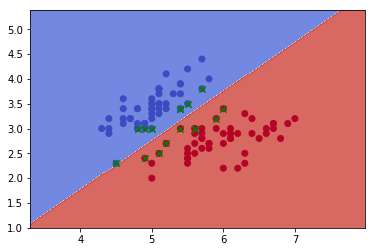

In [53]:
#Affichage de la surface de décision
#on va discrétiser l'espace avec un pas h
h=0.02

X=X_iris_bin
Y=Y_iris_bin
print(X.shape)
print(Y.shape)

# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx.shape)
print(yy.shape)

#Prediction de la classe des points de la surface de décision
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) #Z(51700,)  predit a parti du modele svm 
Z = Z.reshape(xx.shape)#Z(220,235)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)

#Affichage des vecteurs supports
plt.scatter(X[SV_ind, 0], X[SV_ind, 1], c='green', marker='x', s= 40) 
plt.show()

#en bleu setosa
#en rouge versicolor

## - Classification multiclasse lineaire

In [54]:
#on considère toujours les  premières caractéristiques
X_iris = flower.data[:, :2]
Y_iris = flower.target

In [55]:
#Apprentissage du modèle linéaire pour C fixé
C=10.0
svc = svm.SVC(kernel='linear', C=C).fit(X_iris, Y_iris)
svc.fit(X_iris, Y_iris) 
svc.get_params() 
svc.support_ #indice des vecteurs support
svc.support_vectors_
SV_multi=svc.support_vectors_
SV_multi_ind=svc.support_


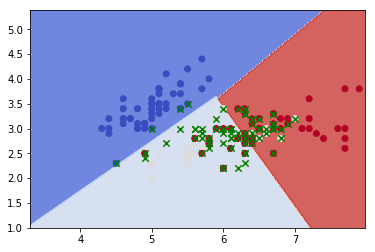

In [56]:
#Affichage de la surface de décision et des vecteurs support
#on va discrétiser l'espace avec un pas h
h=0.02
X=X_iris
Y=Y_iris

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) #Z(51700,) renvoie classe (0 ou 1)
Z = Z.reshape(xx.shape)#Z(220,235)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Affichage des points d'apprentissage
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
#Affichage des vecteurs support
plt.scatter(X[SV_multi_ind, 0], X[SV_multi_ind, 1], c='green', marker='x', s= 40)
plt.show()

#### Reprendre les deux blocs ci-dessus (apprentissage et visualisation) en faisant varier la valeur de C. Qu'observez-vous?

## - Classification multiclasse non-lineaire

In [57]:
#Apprentissage du modèle
svc_NL = svm.SVC(kernel='rbf', C=C).fit(X_iris, Y_iris)
#svc_NL.fit(X_iris, Y_iris) 
svc_NL.get_params() 
SV_multiNL=svc_NL.support_vectors_
SV_multiNL_ind=svc_NL.support_


In [58]:
#Affichage de la surface de décision et des vecteurs support
X=X_iris
Y=Y_iris
print(C)
print(h)
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svc_NL.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[SV_multiNL_ind, 0], X[SV_multiNL_ind, 1], c='green', marker='x', s= 40)
plt.show()

10.0
0.02


#### Reprendre les deux blocs ci-dessus (apprentissage et visualisation) en faisant varier la valeur de  gamma. Qu'observez-vous?

#### Répondre ici :

In [59]:
#optimisation de gamma
from sklearn.model_selection import validation_curve
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(svm.SVC(), X, Y, param_name="gamma", param_range=param_range, cv=5, scoring="accuracy", n_jobs=1)
print(train_scores.shape)

(5, 5)


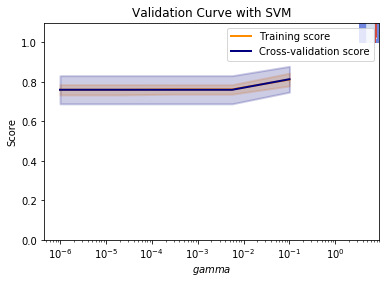

In [60]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [61]:
#optimisation de C
param_range = np.logspace(-2, 4, 7)
train_scores, test_scores = validation_curve(svm.SVC(), X, Y, param_name="C", param_range=param_range, cv=10, scoring="accuracy", n_jobs=1)

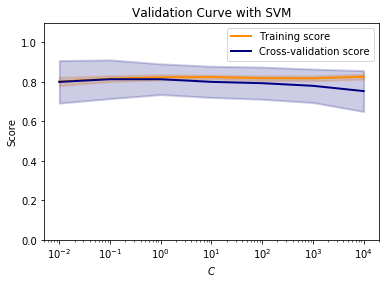

In [62]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$C$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()